In [1]:
import sys
# please insert the glycompare to the PATH
sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/')

In [2]:
import os
from importlib import reload

import pandas as pd
import seaborn as sns
from scipy.stats import zscore

from glycompare import *
import matplotlib.pyplot as plt
from copy import deepcopy
# reload(pipeline_functions)
%matplotlib inline


Thanks for using the GlyCompare v1.1, 
Please check our github for the latest update.


Bokan & Ben,
10/1/2019




# Initialization


    04/02/2019 need to approve parse the meta table, glycan id (unresolved)
    04/14/2019 modified for the paper 


In [3]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = False
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/'
project_name = "paper_epo"
costumized_glycan_identifier = True
external_profile_naming= True
reload(pipeline_functions)

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, glytoucan_db_addr=glytoucan_db_addr)
keywords_dict

{'project_name': 'paper_epo',
 'working_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/glycoct/',
 'source_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/source_data/',
 'output_data_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/',
 'plot_output_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_plot/',
 'glycan_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/paper_epo_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/paper_epo_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/paper_epo_substructure_glycoct_dict.json',
 'substructure_glycoct_vec_addr': '/Use

In [4]:
pipeline_functions.check_init_dir(keywords_dict)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


In [11]:
# reload(pipeline_functions)
meta_name = pd.read_csv(os.path.join(working_addr,'source_data','glycan_id_list.txt'), sep='\t')
structure_loader = meta_name['glycan_id'].tolist()
data_type = 'used'
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                           data_type=data_type, 
                                           structure_loader=structure_loader)


Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
Loaded the glycan structure from glycan_glycoct_dict


In [12]:
reload(pipeline_functions)
reload(merge_substructure_vec)
glycan_substructure_occurance_dict = pipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, 
                                                                     num_processors=num_processors,
                                                                     linkage_specific=linkage_specific, 
                                                                     forced=False)

start glycan_dict
finished glycan deconvolution


In [13]:
reload(pipeline_functions)
# print(keywords_dict['name_to_id_addr'])
abd_table = glycan_io.load_table(os.path.join(keywords_dict['source_dir'], 'abundance_table.xls'))

_, glycoprofile_list = pipeline_functions.glycoprofile_pip(keywords_dict, 
                                                           abd_table, 
                                                           unique_glycan_identifier_to_structure_id=False, 
                                                           already_glytoucan_id=False,
                                                           external_profile_naming=True, 
                                                           forced=True)

abd_list 57 profile_list 34
57 34


## We only chose 16 glycoprofiles out of 34 glycoprofiles
    1. There are 34 glycoprofiles in original paper. Yang, Z. et al. Engineered CHO cells for production of diverse, homogeneous glycoproteins. Nat. Biotechnol. 33, 842–844 (2015). 
    2. We only chose 16 gycoprofiles that overlap with glycoprofiles in Čaval, T., Tian, W., Yang, Z., Clausen, H. & Heck, A. J. R. Direct quality control of glycoengineered erythropoietin variants. Nat. Commun. 9, 3342 (2018). Both data are from the same lab. 
    3. We are compareing the similarity of clustering results and showed the clustering difference in supplementary figure S2.


In [14]:
_name_dict = json_utility.load_json(keywords_dict['source_dir']+'external_profile_naming.json')
selected_name_list = ["EPO127.mgat1.",
"EPO174.mgat2.",
"EPO266.fut8.",
"st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"mgat4A.mgat4B.mgat5",
"B3gnt2.mgat4a.mgat4b.mgat5",
"st3gal4.st3gal6",
"B4GalT1",
"B4GalT2",
"B4GalT3",
"WT",
"B4GalT4",
"EPO78.mgat4B.",
"mgat4A.mgat4B",
"mgat5"]

select_col=[]
_ = {}
for i,j in _name_dict.items():
    _[j] = i
    
for i in selected_name_list:
    select_col.append(_[i])
print(select_col)

['30', '25', '34', '21', '22', '5', '20', '18', '6', '7', '8', '1', '9', '28', '3', '4']


In [15]:
feature_name = []
profile_name = []

selected_profile = [30, 25, 34, 21, 22, 5, 20, 18, 6, 7, 8, 1, 9, 28, 3, 4]
for i in selected_profile:
    profile_name.append(_name_dict[str(i)])
    for j in glycoprofile_list[i-1].glycan_id_list:
        feature_name.append(j)

feature_name = list(set(feature_name))
print(feature_name)
print(selected_profile)
print(profile_name)

['G30460NZ', '3416.2', 'G79457WN', '2693.2', '2401.1', 'G80264ZA', '4587.1', 'G49604DB', 'G37597FW', '3416.3', 'G76812VG', '3865.1', 'G10691MJ', '4675.1', 'G54338PJ', 'G04483SK', 'G00176HZ', 'G99891PR', 'G20924UR', 'G75308SV', 'G60415BS', 'G12398HZ', 'G86696LV', 'G56516KW', 'G09280JF', 'G80858MF', 'G39813YP', 'G49721VX', '5486.1', 'G39439UR', 'G05203UQ', '1754.1', '2967.1', 'G39764AC', 'G17689DH', '3416.1', 'G88127MB', '2605.1', 'G79412GP', '3592.1', 'G07483YN', 'G05098FE', 'G88966ZO', 'G85809SI', 'G40242TG', '4041.1', 'G07568IR', '5312.1', 'G54953LX', 'G58667NI', 'G23295TF', '3055.1', 'G90130AG', 'G80393PG', '3457.1']
[30, 25, 34, 21, 22, 5, 20, 18, 6, 7, 8, 1, 9, 28, 3, 4]
['EPO127.mgat1.', 'EPO174.mgat2.', 'EPO266.fut8.', 'st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'mgat4A.mgat4B.mgat5', 'B3gnt2.mgat4a.mgat4b.mgat5', 'st3gal4.st3gal6', 'B4GalT1', 'B4GalT2', 'B4GalT3', 'WT', 'B4GalT4', 'EPO78.mgat4B.', 'mgat4A.mgat4B', 'mgat5']


# Raw glycan clustering plot for Fig 2a and Fig S1, 52/77 of glycans in 16 glycoprofiles has non-zero abundance 
### Note: the order of rows and columns might be different from the plots in paper while the hierachy remain stable, because the orders are automatically arranged by algorithm.

In [16]:
import pandas as pd
import numpy as np
abundance_table = np.zeros((len(feature_name), len(selected_profile)))

for i in range(len(selected_profile)):
    _profile_idex = selected_profile[i]-1
    _profile_dict = dict(zip(glycoprofile_list[_profile_idex].glycan_id_list, glycoprofile_list[_profile_idex].relative_abundance))
    
    for j in range(len(feature_name)):
        if feature_name[j] in _profile_dict:
            abundance_table[j,i] = _profile_dict[feature_name[j]]
index_list = []
for i in range(len(abundance_table)):
    if sum(abundance_table[i,:])!=0:
        index_list.append(i)
# len(index_list)
abundance_table = abundance_table[index_list,:]

#     abundance_table[i] = abundance_table[i]/sum(abundance_table[i])
feature_name=[feature_name[i] for i in index_list]
pd_table = pd.DataFrame(abundance_table, columns=profile_name, index=feature_name)
for i in pd_table.columns:
#     print(i,pd_table[i], sum(pd_table[i]))
    pd_table[i] = pd_table[i]/sum(pd_table[i])
pd_table.head()

,EPO127.mgat1.,EPO174.mgat2.,EPO266.fut8.,st3gal4.st3gal6.mgat4a.mgat4b.mgat5,KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5,mgat4A.mgat4B.mgat5,B3gnt2.mgat4a.mgat4b.mgat5,st3gal4.st3gal6,B4GalT1,B4GalT2,B4GalT3,WT,B4GalT4,EPO78.mgat4B.,mgat4A.mgat4B,mgat5
G30460NZ,0.0,0.000000,0.0,0.000000,0.021028,0.228648,0.284713,0.0,0.000000,0.070769,0.044512,0.038672,0.0,0.0,0.0,0.068508
3416.2,0.0,0.487651,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
G79457WN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.058877,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2693.2,0.0,0.000000,0.0,0.085048,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2401.1,0.0,0.031354,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


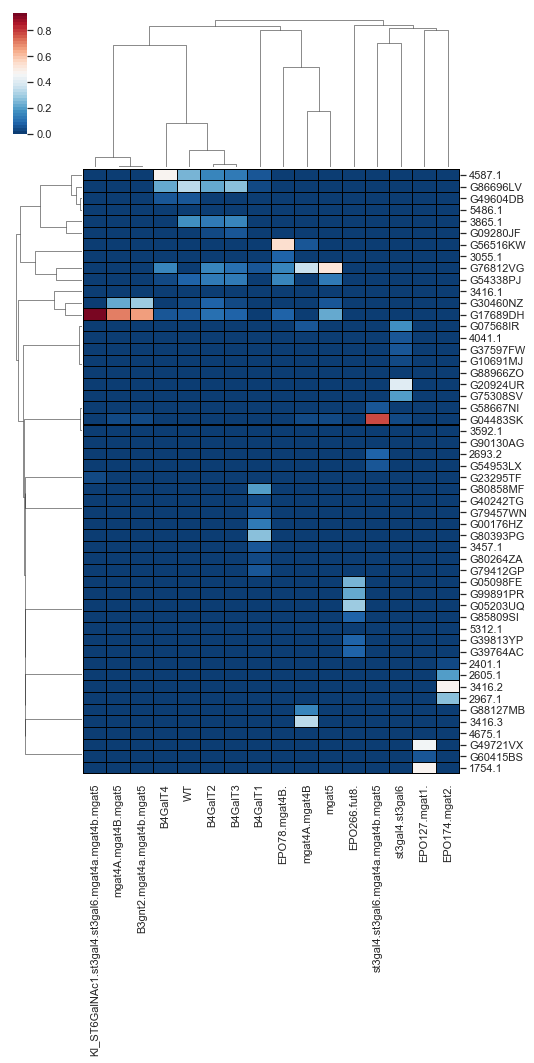

In [18]:
name_prefix = 'full_glycan'
# pd_table.to_csv('/Users/apple/PycharmProjects/Glycompare/paper_supplementory/data_generator/paper_epo/intermediate_file/glycan_abd_table.xls')

cmap = sns.color_palette("RdBu_r", 40)
# g = sns.clustermap(pd_table.round(3), metric="correlation", cmap=cmap, linewidths=.01, annot=False, figsize=(7,7),method='complete')
# plt.savefig(keywords_dict['plot_output_dir']+'raw_glycan_cluster.eps')
g = sns.clustermap(pd_table.round(3), metric="correlation", cmap=cmap, linewidths=.01
                   , figsize=(8,14), linecolor='black', method='complete')
plt.savefig(keywords_dict['plot_output_dir']+'raw_glycan_cluster_no_anno.eps')
# clustering_analysis_pip.draw_profile_cluster(g, pd_table, profile_name, color_threshold=0.95)

# load substructure_abd table

the glycan core is
start substructure_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
len 19
len 20
len 21
len 22
Finish the n-glycan match  722  substructures are matched to the n-glycan core
start building dependence_tree
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
Start dropping nodes with weight zero, nodes count: 722
Nodes left [96, 139, 140, 199, 200, 201, 282, 283, 284, 285, 390, 391, 392, 393, 394, 395, 396, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105,

(120, 16)

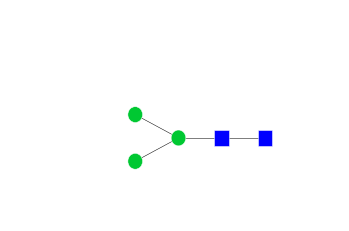

In [92]:
# reload(pipeline_functions)
core=select_motifs.nglycan_core

# # motif_abd_table, substructure_lab, merged_weights_dict=pipeline_functions.select_motifs_pip(keywords_dict, 
# #                                                                                             linkage_specific=linkage_specific,   
# #                                                                                             core=core,
# #                                                                                             only_substructures_start_from_root=True,
# #                                                                                             select_col= select_col)


substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']
assert os.path.isfile(substructure_glycoct_dict_addr), 'missing ' + substructure_glycoct_dict_addr
substructure_abd_table_addr = keywords_dict['substructure_abd_table_addr']
assert os.path.isfile(substructure_abd_table_addr), 'missing' + substructure_abd_table_addr

substructure_abd_table = pd.read_csv(substructure_abd_table_addr, index_col=0)
substructure_dict = glycan_io.load_substructure_vec_from_json(substructure_glycoct_dict_addr)
# _substructure_lab = select_substructures.substructureLabwithCore(substructure_dict, glycan_core=select_substructures.nglycan_core, linkage_specific=False)  # unicarbkb_substructures_12259.json
# _substructure_lab.get_dependence_tree_core()


assert core != '', 'Should specify core'
_substructure_lab = select_motifs.substructureLabwithCore(substructure_=substructure_dict,
                                            glycan_core=core,
                                            linkage_specific=linkage_specific)  # unicarbkb_substructures_12259.json
_substructure_lab.get_dependence_tree_core()
a_node_state = select_motifs.NodesState(dependence_tree=_substructure_lab.substructure_dep_tree_core,
                                        substructure_weight=select_motifs.get_weight_dict(
                                            substructure_abd_table[select_col]),
                                        linkage_specific=linkage_specific)
node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = a_node_state.nodes_dropping_pipe(
    drop_parellel=False, drop_diff_abund=True)
print("after selection, the nodes preserved: ", mod_nodes)
print("after selection, the edges preserved: ", mod_edges)

remove_core=True
if remove_core:
    if _substructure_lab.core_index in mod_nodes:
        mod_nodes.remove(_substructure_lab.core_index)
    print("Removed core, the index is", _substructure_lab.core_index)
motif_dict = {}
for i in mod_nodes:
    motif_dict[i] = _substructure_lab.substructure_vec[i]
glycan_io.output_glycan_dict_to_glycoct_dict(motif_dict, keywords_dict['motif_glycoct_dict_addr'])

motif_abd_table = substructure_abd_table[select_col][substructure_abd_table.index.isin(mod_nodes)]
motif_abd_table_addr = keywords_dict['motif_abd_table_addr']
motif_abd_table.to_csv(motif_abd_table_addr)

motif_abd_table.shape

In [149]:
node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = a_node_state.nodes_dropping_pipe(drop_parellel=False, drop_diff_abund=True)


_collapsed_edge_list, _collapsed_node, _collapsed_edge_attri = a_node_state.collapsing_potential_node()
len(_collapsed_node)
a_node_state.upload_network(_collapsed_edge_list, _collapsed_node)

_a.nodes 614
_a.nodes 614
merged_weights_dict 614
After first drop 458 + 156 =  614 614.0
_temp_dropping_list 52 35
493 + 121 =  614 614.0
mod_nodes 121
mod_edges 164


In [150]:
node_attri

{51: {'kept': 'yes'},
 77: {'kept': 'yes'},
 84: {'kept': 'yes'},
 92: {'kept': 'yes'},
 104: {'kept': 'yes'},
 114: {'kept': 'ttest'},
 115: {'kept': 'yes'},
 120: {'kept': 'yes'},
 136: {'kept': 'yes'},
 142: {'kept': 'med_root'},
 149: {'kept': 'ttest'},
 150: {'kept': 'ttest'},
 151: {'kept': 'yes'},
 163: {'kept': 'ttest'},
 167: {'kept': 'yes'},
 168: {'kept': 'yes'},
 173: {'kept': 'yes'},
 184: {'kept': 'yes'},
 202: {'kept': 'yes'},
 212: {'kept': 'yes'},
 213: {'kept': 'ttest'},
 214: {'kept': 'yes'},
 215: {'kept': 'ttest'},
 216: {'kept': 'yes'},
 217: {'kept': 'ttest'},
 227: {'kept': 'yes'},
 231: {'kept': 'yes'},
 232: {'kept': 'yes'},
 237: {'kept': 'yes'},
 238: {'kept': 'med_root'},
 249: {'kept': 'ttest'},
 252: {'kept': 'med_root'},
 254: {'kept': 'ttest'},
 256: {'kept': 'yes'},
 287: {'kept': 'ttest'},
 288: {'kept': 'yes'},
 300: {'kept': 'ttest'},
 301: {'kept': 'ttest'},
 302: {'kept': 'yes'},
 303: {'kept': 'yes'},
 304: {'kept': 'ttest'},
 314: {'kept': 'yes'

In [142]:
_collapsed_edge_attri

{51: {77: {'kept': 'noSomeWhatImp'},
  84: {'kept': 'noSomeWhatImp'},
  92: {'kept': 'noSomeWhatImp'}},
 77: {104: {'kept': 'noSomeWhatImp'},
  114: {'kept': 'noSomeWhatImp'},
  115: {'kept': 'noSomeWhatImp'},
  120: {'kept': 'noSomeWhatImp'}},
 84: {120: {'kept': 'noSomeWhatImp'}, 142: {'kept': 'noSomeWhatImp'}},
 92: {136: {'kept': 'noSomeWhatImp'}, 142: {'kept': 'noSomeWhatImp'}},
 104: {149: {'kept': 'noSomeWhatImp'},
  150: {'kept': 'noSomeWhatImp'},
  151: {'kept': 'noSomeWhatImp'},
  167: {'kept': 'noSomeWhatImp'},
  173: {'kept': 'noSomeWhatImp'}},
 114: {150: {'kept': 'ttestSomeWhatImp'},
  163: {'kept': 'ttestSomeWhatImp'},
  184: {'kept': 'ttestSomeWhatImp'}},
 115: {151: {'kept': 'noSomeWhatImp'},
  163: {'kept': 'noSomeWhatImp'},
  168: {'kept': 'noSomeWhatImp'}},
 120: {167: {'kept': 'noSomeWhatImp'},
  168: {'kept': 'noSomeWhatImp'},
  184: {'kept': 'noSomeWhatImp'}},
 136: {202: {'kept': 'NotImp'}},
 142: {202: {'kept': 'Dep'}},
 149: {213: {'kept': 'ttestSomeWhatImp'},

In [96]:
_collapsed_node

[51,
 77,
 84,
 92,
 104,
 114,
 115,
 120,
 136,
 142,
 149,
 150,
 151,
 163,
 167,
 168,
 173,
 184,
 202,
 212,
 213,
 214,
 215,
 216,
 217,
 227,
 231,
 232,
 237,
 238,
 249,
 252,
 254,
 256,
 287,
 288,
 300,
 301,
 302,
 303,
 304,
 314,
 315,
 316,
 320,
 321,
 322,
 328,
 332,
 335,
 336,
 337,
 339,
 340,
 341,
 343,
 344,
 351,
 365,
 399,
 400,
 401,
 402,
 403,
 414,
 415,
 416,
 417,
 422,
 424,
 425,
 426,
 429,
 430,
 431,
 438,
 439,
 440,
 443,
 444,
 445,
 446,
 447,
 448,
 450,
 451,
 452,
 454,
 460,
 461,
 462,
 463,
 485,
 486,
 487,
 497,
 500,
 520,
 545,
 546,
 547,
 548,
 549,
 550,
 556,
 558,
 562,
 563,
 567,
 568,
 571,
 575,
 576,
 577,
 578,
 579,
 580,
 582,
 584,
 585,
 586,
 587,
 588,
 589,
 598,
 599,
 601,
 602,
 603,
 605,
 606,
 641,
 642,
 643,
 646,
 647,
 648,
 649,
 663,
 673,
 681,
 683,
 713,
 714,
 721,
 722,
 723,
 724,
 726,
 729,
 731,
 734,
 739,
 740,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 767,
 768,
 777,
 800,
 8

In [218]:
# a_new_dict = {}
a_node_new_index_dict = {}
for idex, i in enumerate(_collapsed_node):
    a_node_new_index_dict[i] = idex+1


for idex,i in enumerate([24,9,23,8,22,21,15,16,1,19,18,17,3,2,20,12,13,10,11,6,5,14,7,4]):
    a_new_dict[idex+1] = glyco_motif_cluster_dict[i]
    for nodes in glyco_motif_cluster_dict[i]:
        a_node_new_index_dict[nodes] = idex-24
a_node_new_index_dict[51] = -24

a_node_new_index_list = list(set([a_node_new_index_dict[i] for i in a_node_new_index_dict]))
print(sorted(a_node_new_index_list))
cluster_edge = []
for _in, _out in _collapsed_edge_list:
    cluster_edge.append((a_node_new_index_dict[_in], a_node_new_index_dict[_out]))
    print((_in, _out), cluster_edge[-1])

# a_node_attri_dict 
# a_new_network = {}
# a_new_network['nodes_cluster'] = a_new_dict
# a_new_network['edge'] = _collapsed_edge_list
# a_new_network['edge_attr'] = _collapsed_edge_attri
# a_new_network['all_nodes'] = _collapsed_node
# a_new_network['nodes_attri'] = 

# json_utility.store_json("/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/network.json", a_new_network)

[-24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 6, 10, 11, 12, 14, 21, 23, 25, 30, 31, 32, 33, 35, 37, 38, 41, 43, 45, 46, 50, 51, 52, 53, 54, 59, 60, 62, 63, 66, 68, 69, 70, 71, 73, 75, 76, 79, 80, 81, 82, 84, 89, 90, 91, 92, 93, 94, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 113, 115, 116, 117, 118, 119, 120, 122, 125, 127, 128, 129, 130, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 151, 152, 153, 155, 156, 158, 160, 164, 165, 166, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 189, 194, 196, 198, 199, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 218, 224, 225, 228, 229, 230, 231, 232, 233, 234, 241, 245, 246, 247, 250, 252]
(51, 77) (-24, -24)
(51, 84) (-24, -23)
(51, 92) (-24, -1)
(77, 104) (-24, -24)
(77, 114) (-24, 6)
(77, 115) (-24, -22)
(77, 120) (-24, -23)
(84, 120) (-23, -23)
(84, 142) (-23, 10)
(92, 136) (-1, -1)
(92

(985, 1331) (-11, 246)
(985, 1467) (-11, -11)
(986, 1644) (-16, -7)
(986, 1467) (-16, -11)
(993, 1700) (203, -3)
(993, 1578) (203, -7)
(993, 1643) (203, -3)
(993, 1644) (203, -7)
(993, 1679) (203, -3)
(993, 1167) (203, 228)
(993, 1330) (203, 245)
(993, 1331) (203, 246)
(994, 1700) (204, -3)
(994, 1578) (204, -7)
(994, 1643) (204, -3)
(994, 1644) (204, -7)
(994, 1196) (204, 230)
(994, 1679) (204, -3)
(994, 1330) (204, 245)
(994, 1331) (204, 246)
(998, 1700) (205, -3)
(998, 1578) (205, -7)
(998, 1643) (205, -3)
(998, 1644) (205, -7)
(998, 1177) (205, 229)
(1009, 1700) (206, -3)
(1009, 1196) (206, 230)
(1009, 1647) (206, -10)
(1010, 1700) (207, -3)
(1010, 1647) (207, -10)
(1010, 1199) (207, 231)
(1011, 1201) (208, 232)
(1011, 1700) (208, -3)
(1011, 1647) (208, -10)
(1025, 1700) (209, -3)
(1025, 1196) (209, 230)
(1025, 1695) (209, -4)
(1028, 1695) (210, -4)
(1028, 1700) (210, -3)
(1028, 1199) (210, 231)
(1030, 1700) (211, -3)
(1030, 1223) (211, 233)
(1030, 1647) (211, -10)
(1030, 1584) (21

In [219]:
a_node_new_index_dict

{51: -24,
 77: -24,
 84: -23,
 92: -1,
 104: -24,
 114: 6,
 115: -22,
 120: -23,
 136: -1,
 142: 10,
 149: 11,
 150: 12,
 151: -22,
 163: 14,
 167: -23,
 168: -21,
 173: -16,
 184: -18,
 202: -1,
 212: -17,
 213: 21,
 214: -19,
 215: 23,
 216: -22,
 217: 25,
 227: -9,
 231: -16,
 232: -21,
 237: -16,
 238: 30,
 249: 31,
 252: 32,
 254: 33,
 256: -20,
 287: 35,
 288: -19,
 300: 37,
 301: 38,
 302: -15,
 303: -13,
 304: 41,
 314: -16,
 315: 43,
 316: -21,
 320: 45,
 321: 46,
 322: -12,
 328: -18,
 332: -16,
 335: 50,
 336: 51,
 337: 52,
 339: 53,
 340: 54,
 341: -9,
 343: -20,
 344: -18,
 351: -16,
 365: 59,
 399: 60,
 400: -19,
 401: 62,
 402: 63,
 403: -13,
 414: -15,
 415: 66,
 416: -8,
 417: 68,
 422: 69,
 424: 70,
 425: 71,
 426: -12,
 429: 73,
 430: -12,
 431: 75,
 438: 76,
 439: -15,
 440: -16,
 443: 79,
 444: 80,
 445: 81,
 446: 82,
 447: -9,
 448: 84,
 450: -20,
 451: -18,
 452: -14,
 454: -14,
 460: 89,
 461: 90,
 462: 91,
 463: 92,
 485: 93,
 486: 94,
 487: -16,
 497: 96,
 500

In [220]:
# assigning subtree profile
_array = np.array(substre_profile[[24,9,23,8,22,21,15,16,1,19,18,17,3,2,20,12,13,10,11,6,5,14,7,4]])
_array_1 = np.array(substre_profile_zscore_with_baseWT1)
_wt_dict = _array_1[-6]
_profile_node_attri = {}
for idex, i in enumerate(_wt_dict):
    _profile_node_attri[idex] = i
_profile_node_attri

{0: 0.0,
 1: 0.0,
 2: -0.01100000000000001,
 3: -0.009999999999999898,
 4: -2.249,
 5: -2.225,
 6: -1.181,
 7: 0.03500000000000003,
 8: 0.522,
 9: 0.08199999999999996,
 10: -2.289,
 11: -2.215,
 12: 1.623,
 13: -0.416,
 14: -2.954,
 15: -0.2430000000000001,
 16: -2.477,
 17: -2.032,
 18: -1.702,
 19: 3.4130000000000003,
 20: -1.849,
 21: -2.6740000000000004,
 22: 0.0,
 23: 0.0}

In [199]:
# sorted(a_node_new_index_list)

In [228]:
reindex_nodes={}
new_node_list=[]
new_edge_list=[]
a_node_new_index_dict
for idex,i in enumerate(sorted(a_node_new_index_list)):
#     print(i)
    reindex_nodes[i]=idex+1
    new_node_list.append(idex+1)
# print(reindex_nodes)
for i in a_node_new_index_dict:
    print(i, a_node_new_index_dict[i], reindex_nodes[a_node_new_index_dict[i]])
for i,j in cluster_edge:
    new_edge_list.append((reindex_nodes[i], reindex_nodes[j]))
    
print(reindex_nodes)
new_edge_list=sorted(list(set(new_edge_list)), key=lambda x:x[0])
# new_edge_list=[i for i in new_edge_list if i[0]!=i[1]]

51 -24 1
77 -24 1
84 -23 2
92 -1 24
104 -24 1
114 6 25
115 -22 3
120 -23 2
136 -1 24
142 10 26
149 11 27
150 12 28
151 -22 3
163 14 29
167 -23 2
168 -21 4
173 -16 9
184 -18 7
202 -1 24
212 -17 8
213 21 30
214 -19 6
215 23 31
216 -22 3
217 25 32
227 -9 16
231 -16 9
232 -21 4
237 -16 9
238 30 33
249 31 34
252 32 35
254 33 36
256 -20 5
287 35 37
288 -19 6
300 37 38
301 38 39
302 -15 10
303 -13 12
304 41 40
314 -16 9
315 43 41
316 -21 4
320 45 42
321 46 43
322 -12 13
328 -18 7
332 -16 9
335 50 44
336 51 45
337 52 46
339 53 47
340 54 48
341 -9 16
343 -20 5
344 -18 7
351 -16 9
365 59 49
399 60 50
400 -19 6
401 62 51
402 63 52
403 -13 12
414 -15 10
415 66 53
416 -8 17
417 68 54
422 69 55
424 70 56
425 71 57
426 -12 13
429 73 58
430 -12 13
431 75 59
438 76 60
439 -15 10
440 -16 9
443 79 61
444 80 62
445 81 63
446 82 64
447 -9 16
448 84 65
450 -20 5
451 -18 7
452 -14 11
454 -14 11
460 89 66
461 90 67
462 91 68
463 92 69
485 93 70
486 94 71
487 -16 9
497 96 72
500 -16 9
520 98 73
545 99 74
546 1

In [229]:
new_node_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171]

In [230]:
for i in new_edge_list:
    assert i[0] in new_node_list and i[1] in new_node_list, i

In [231]:
pd.DataFrame(edge_list).to_csv('edge.csv')

In [232]:
nodes_attri={}
import numpy as np
for i in new_node_list:
    if i in _profile_node_attri:
        nodes_attri[i]={'size':_profile_node_attri[i], 'incl':'Y', 'node_name':str(i)}
    else:
        nodes_attri[i]={'size':-0.01,'incl':'N', 'node_name':str(i)}
pd.DataFrame(data=nodes_attri).transpose().to_csv('attribute.csv')


In [211]:
a_node_state.upload_network(new_edge_list, new_node_list,node_attri=nodes_attri,)

In [146]:
from ndex.networkn import NdexGraph
node_attri = 
node_list = new_node_list
edge_attri = {}
edge_list = new_edge_list
G = NdexGraph()
# if node_attri == {}:
# for i in node_list:
#         G.add_node(i, name=str(i), attr_dict={})
# else:
#     
for i in node_list:
#         print('check', i, node_attri[i])
        if i>0:
        
            G.add_node(i, name=str(i), attr_dict={'size':str(0.00001),'in_clus':'Y'})
        else:
            G.add_node(i, name=str(i), attr_dict={'size':s_profile_node_attri[i]})

# color cast
# if edge_attri == {}:
for i in 
edge_list=list(set(edge_list))
for ind, pair in enumerate(edge_list):
    i, j = pair
    G.add_edge(i, j, attr_dict={}, key=ind)
# else:
#     for ind, pair in enumerate(edge_list):
#         i, j = pair
#         # print('check', i, j, edge_attri[i][j])
#         if add_notimp_edge:
#             G.add_edge(i, j, attr_dict=edge_attri[i][j], key=ind)
#         else:
#             if edge_attri[i][j]['kept'].find('Not') == -1:
#                 G.add_edge(i, j, attr_dict=edge_attri[i][j], key=ind)
# G.to_cx
with open('aaa.csv','w') as d:
    for i in edge_list:
        d.write(G.to_cx())

# G.upload_to(server='http://ndexbio.org', username='bobao@ucsd.edu',password='37~bO^#1D3')

TypeError: write() argument must be str, not list

# Raw clustering plot for Figure 2b
### Note: we tested this plot on different version of python. We found that the orders of rows and columns might be different from the plot in paper while the clustering hierachy structrue remain same. The reason is that the orders are automatically arranged by algorithm.
### Note: the raw clustering plot for Figure S3 and S4 are also included.

[173, 231, 237, 314, 332, 351, 440, 487, 500, 606, 641, 752, 814, 986]
[599, 751, 810, 985, 1134, 1305, 1327, 1467]
[322, 426, 430, 563, 575, 740, 800, 982]
[92, 136, 202]
[1571, 1584, 1641, 1695]
[729, 915, 923, 1118, 1158, 1251, 1326, 1407, 1535, 1618]
[920, 1298, 1568]
[168, 232, 316]
[84, 120, 167]
[1578, 1644]
[1572]
[227, 341, 447, 577, 726, 924]
[416, 724, 1109, 1110, 1111, 1296, 1479]
[589, 748, 930, 932, 1119, 1121, 1122, 1301, 1302, 1303, 1455, 1640, 1643, 1679, 1700]
[184, 328, 344, 451]
[212]
[303, 403, 909]
[452, 454, 588, 746, 750, 927, 928, 1120]
[302, 414, 439, 571]
[1647]
[214, 288, 400]
[256, 343, 450, 586]
[115, 151, 216]
[77, 104]


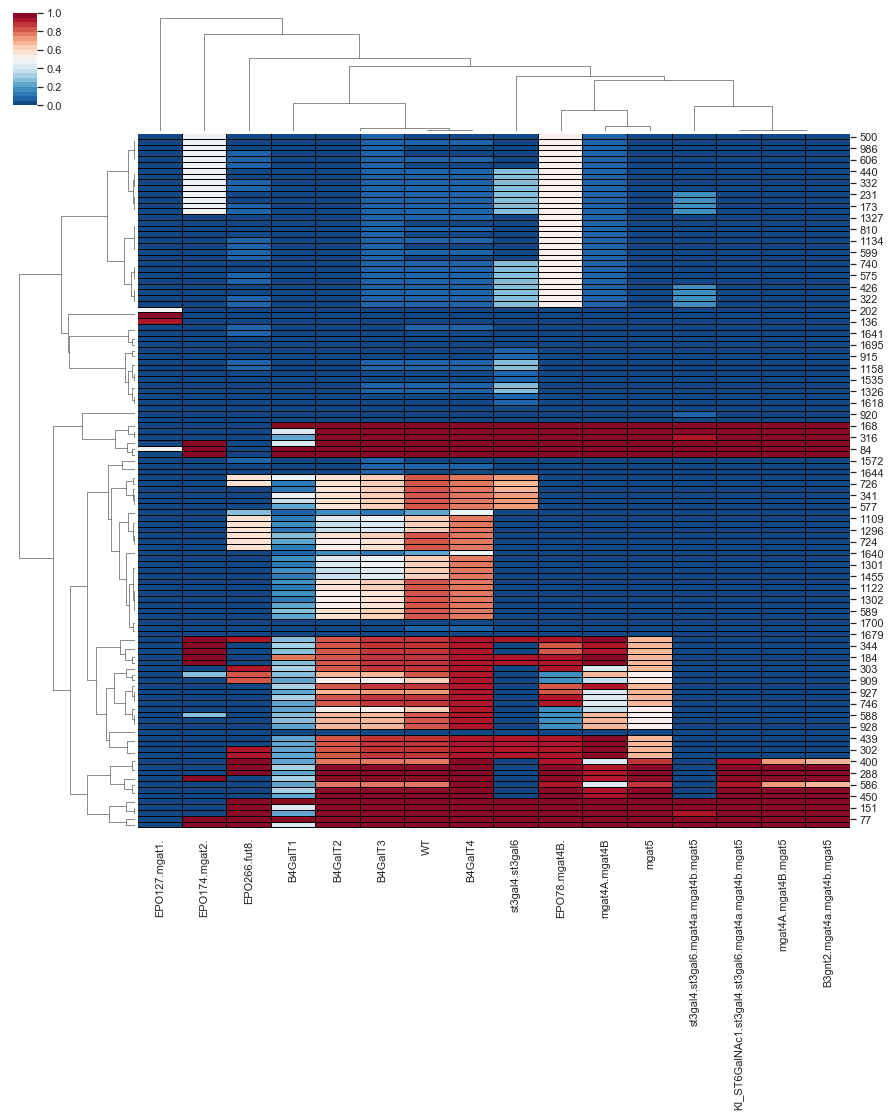

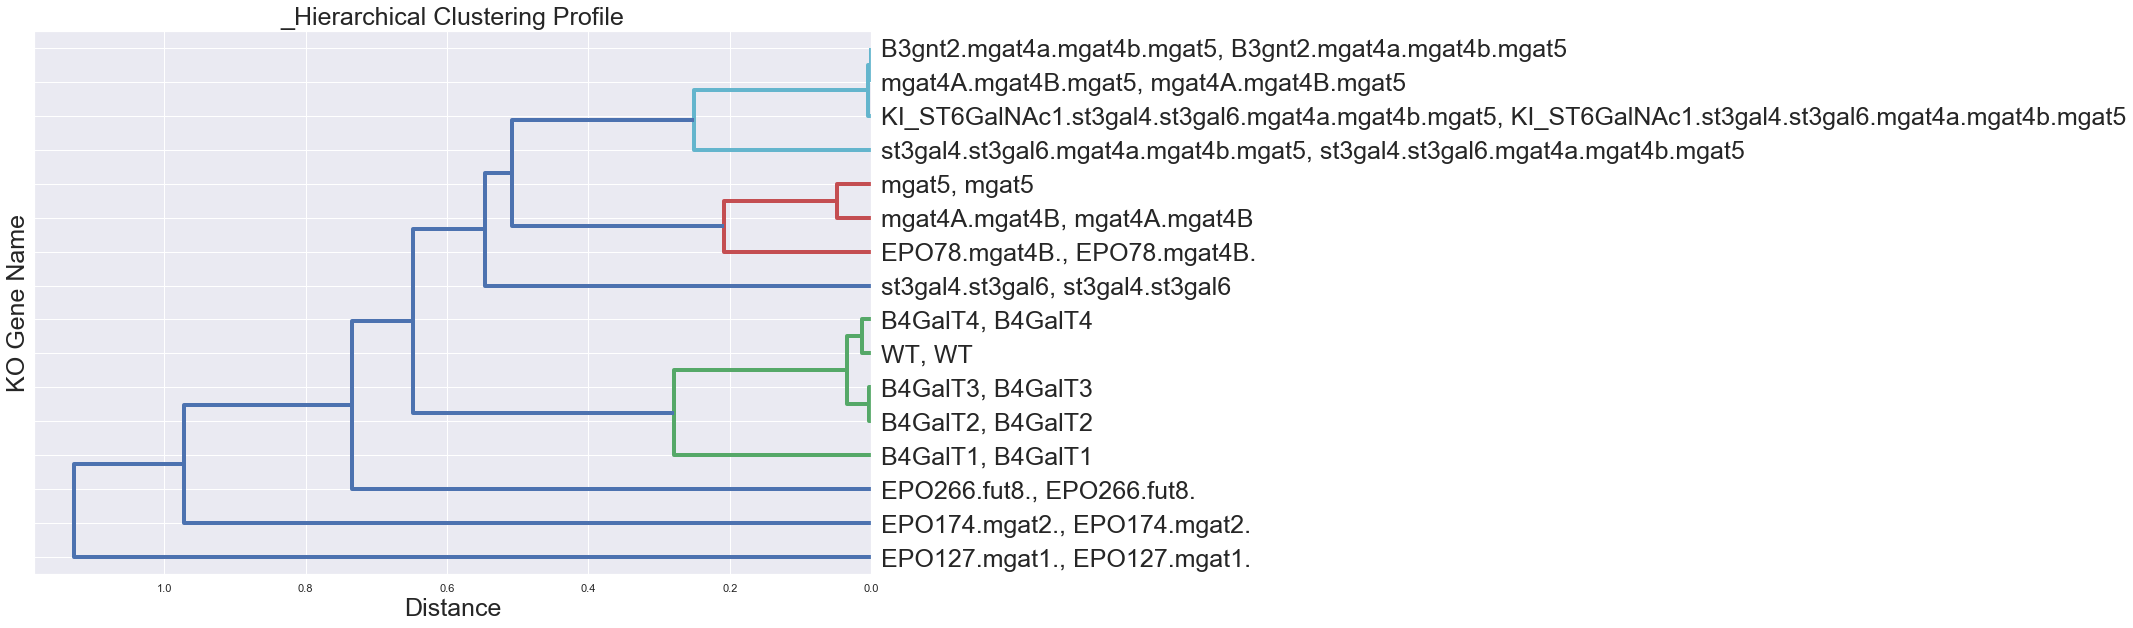

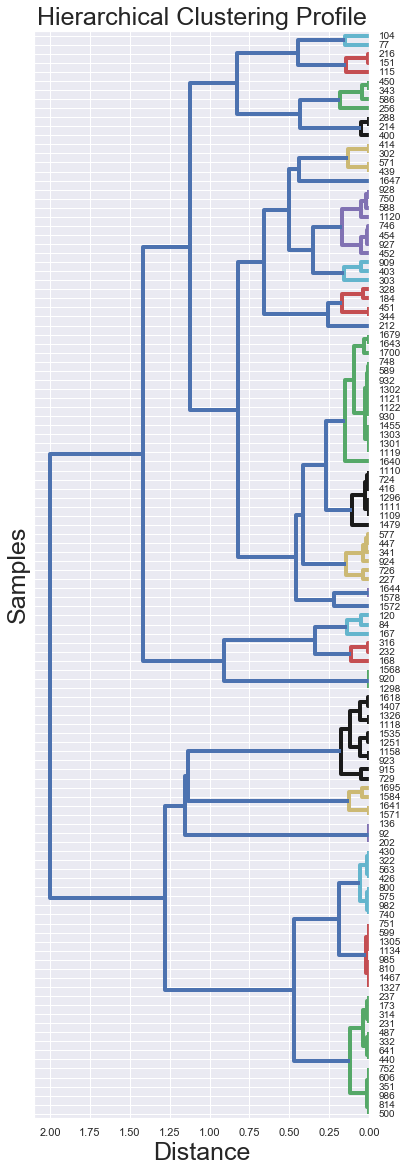

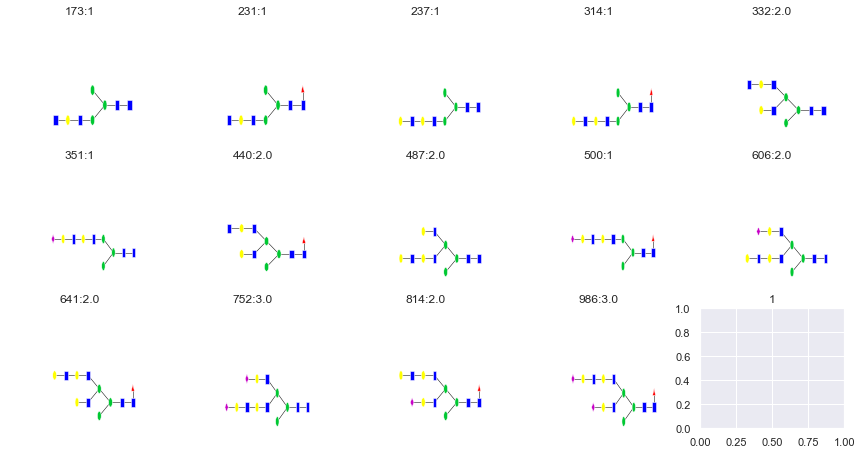

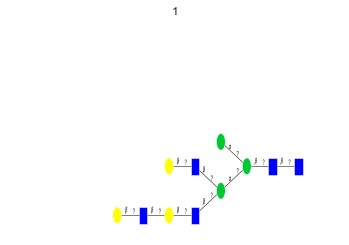

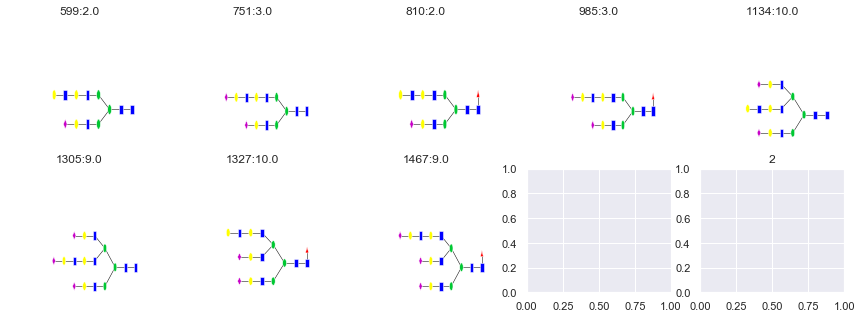

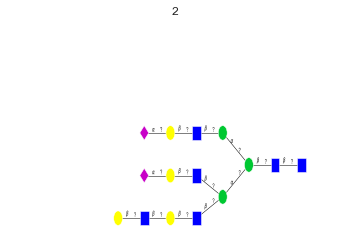

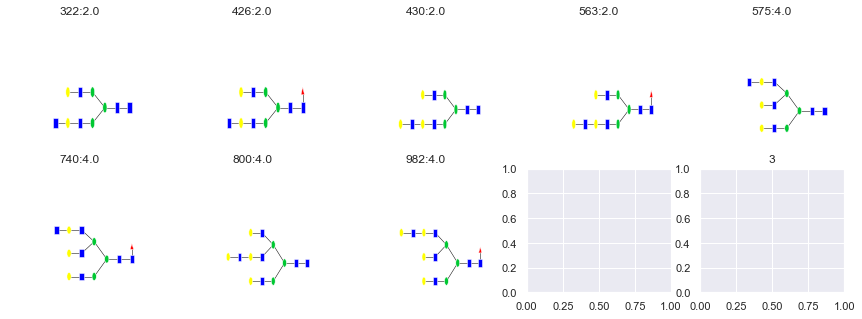

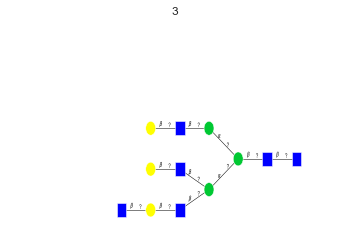

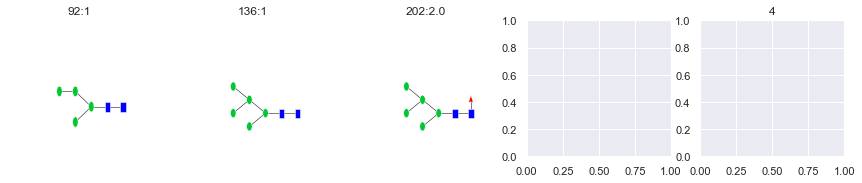

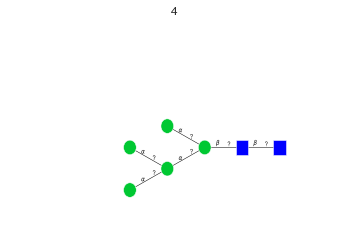

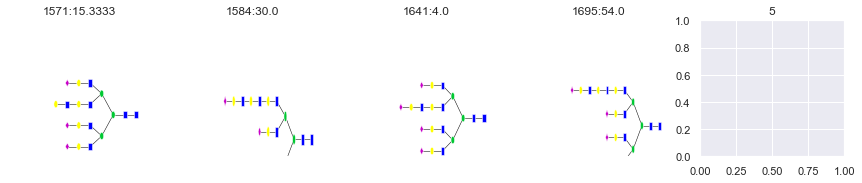

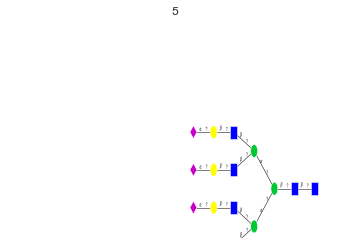

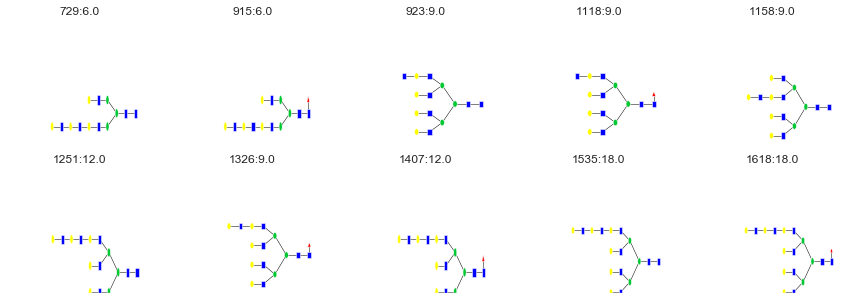

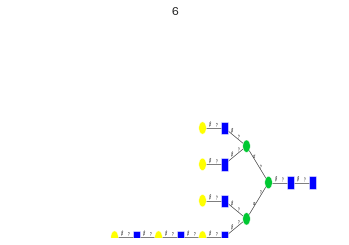

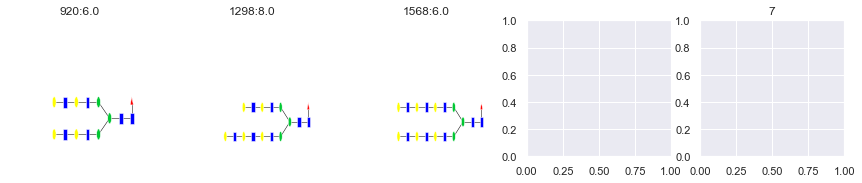

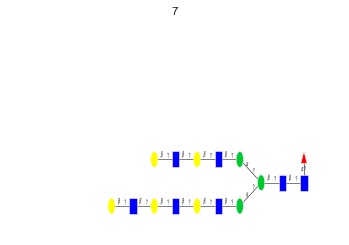

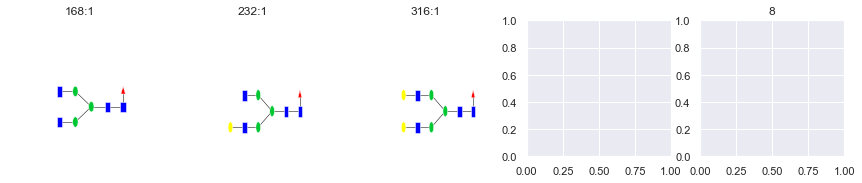

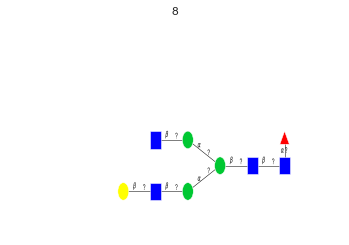

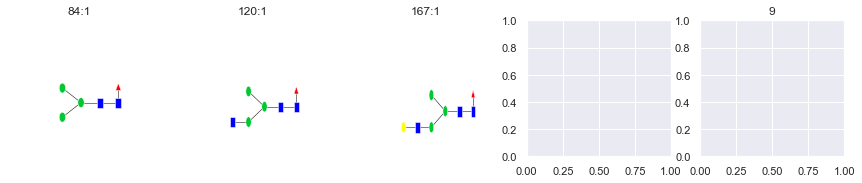

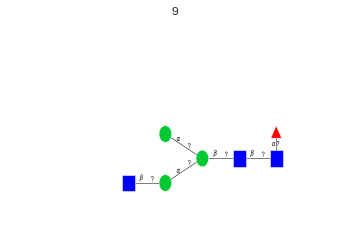

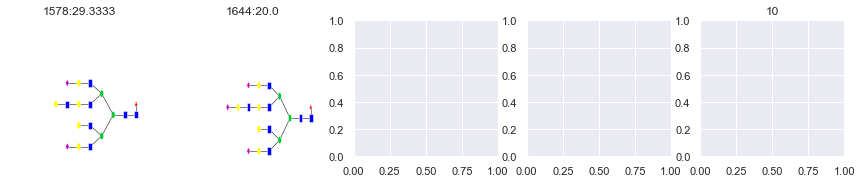

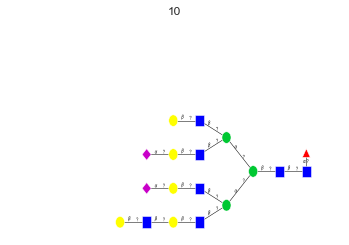

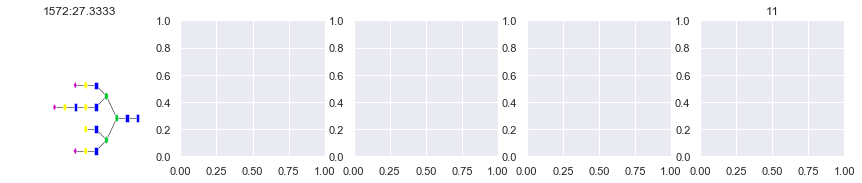

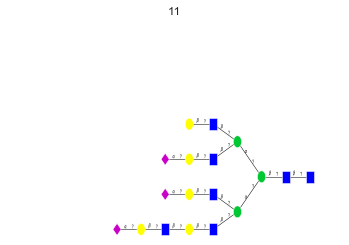

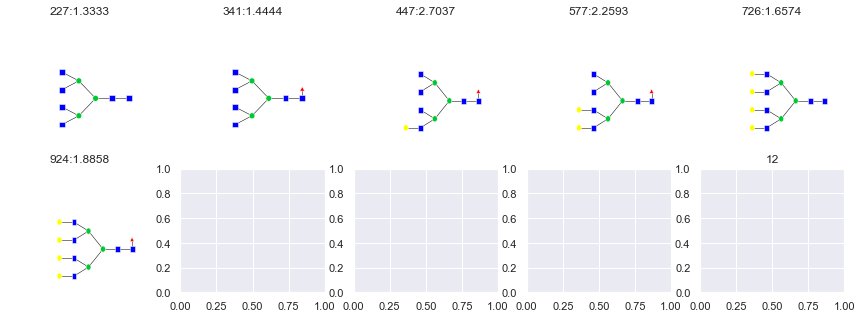

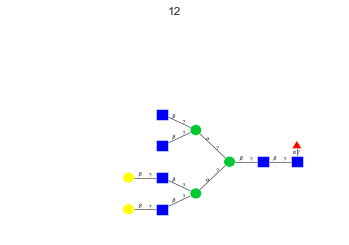

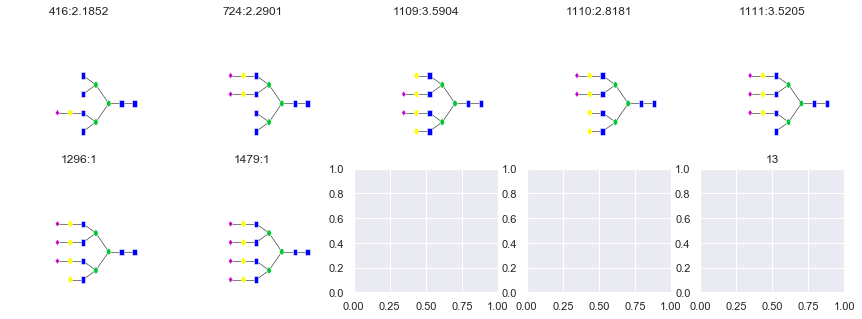

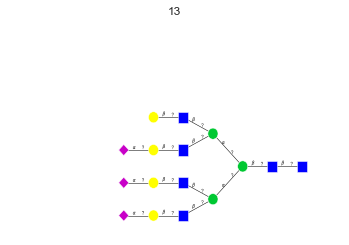

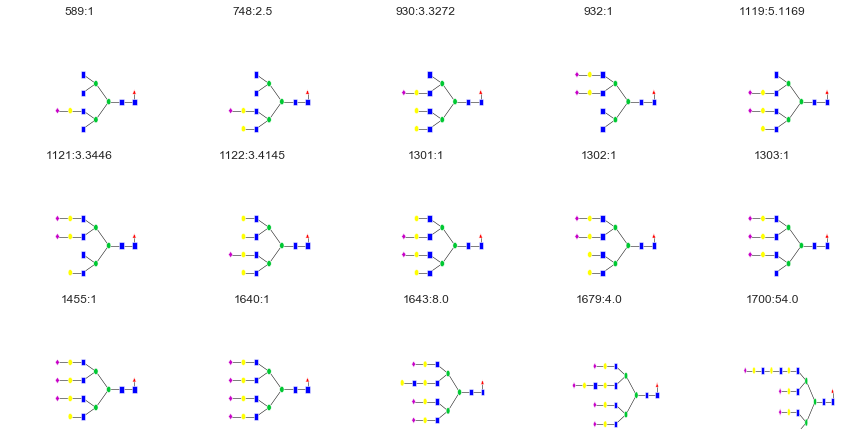

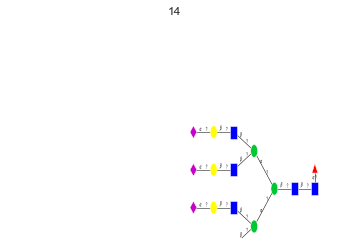

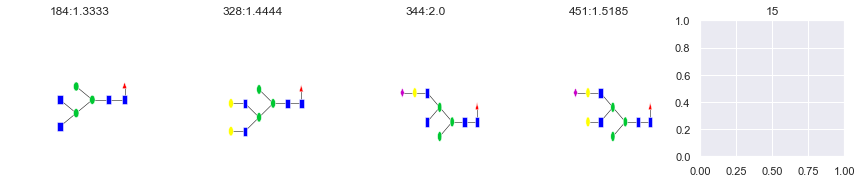

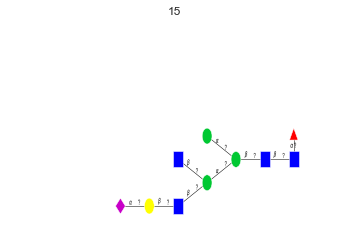

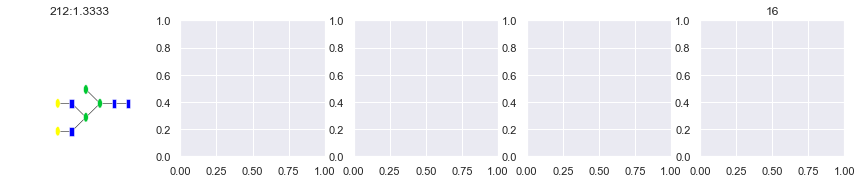

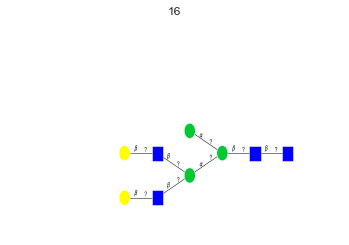

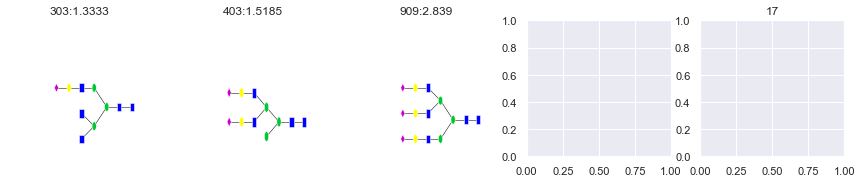

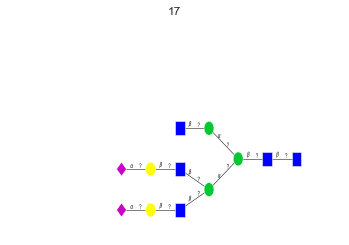

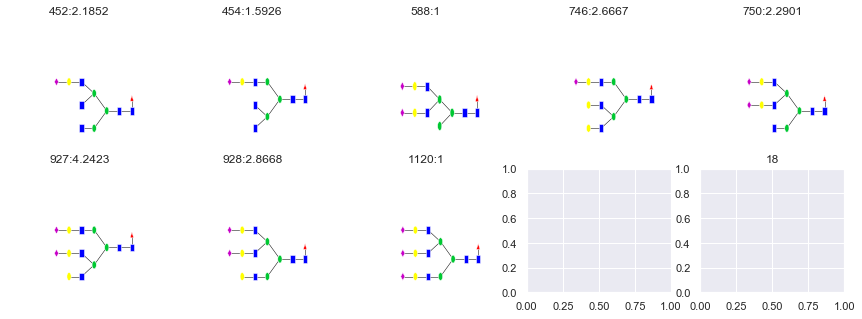

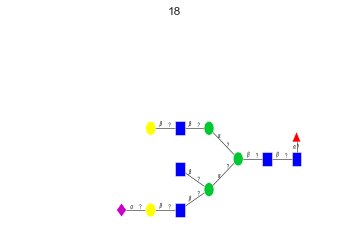

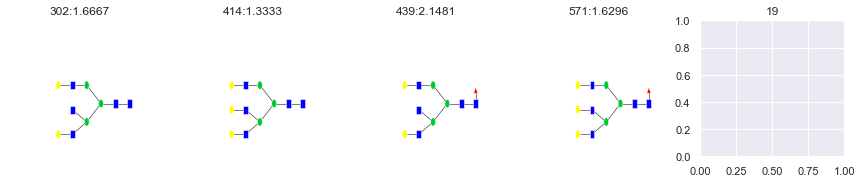

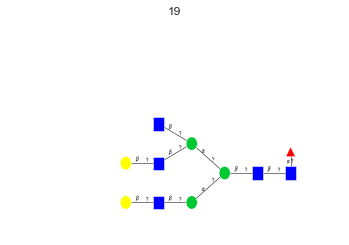

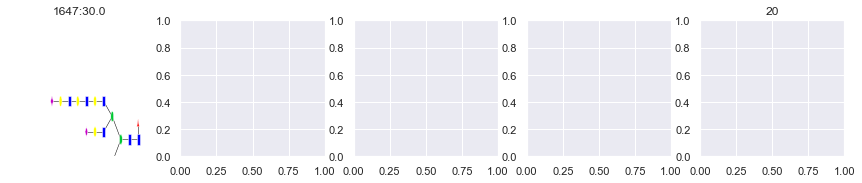

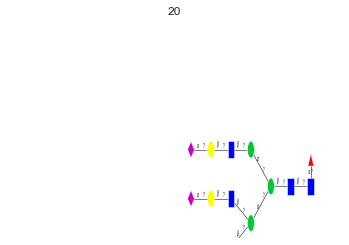

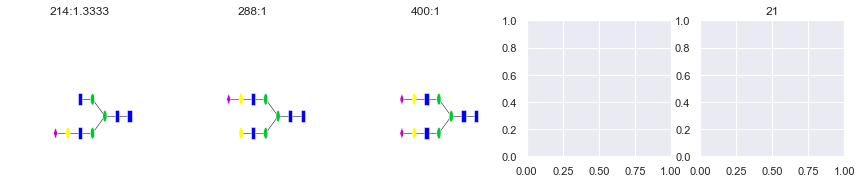

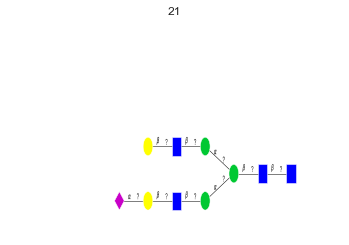

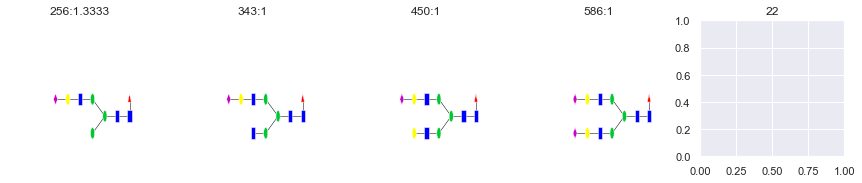

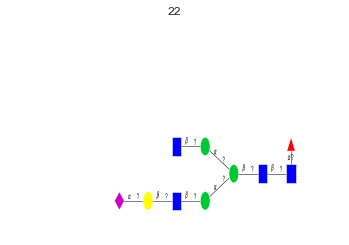

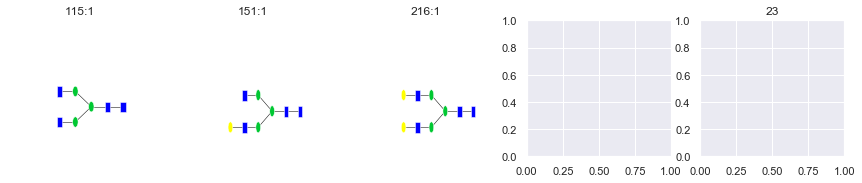

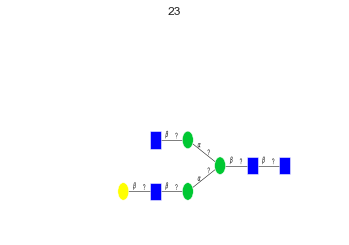

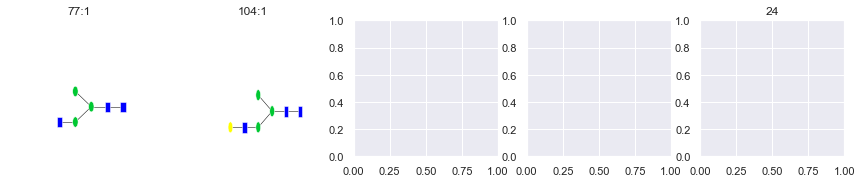

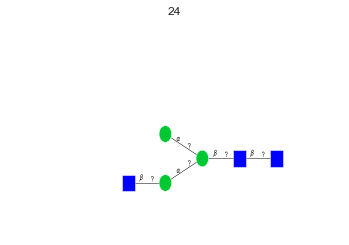

In [183]:
glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict, motif_abd_table, select_profile_name=selected_name_list)
rep_list = pipeline_functions.draw_substructure_representative_pip(glyco_motif_cluster=glyco_motif_cluster_dict,
                                                        substructure_vec=_substructure_lab.substructure_vec,
                                                        motif_weights_dict=merged_weights_dict,
                                                        plot_all_substructure=True,
                                                        address_dir=keywords_dict['plot_output_dir'],
                                                        threshold=0.51,
                                                        plot_rep=True)

In [184]:
# import seaborn as sns
# import clustering_analysis
# import scipy
# from copy import deepcopy
# reload(clustering_analysis)
# # sns.set("RdBu_r", 7)
# # dropper.drop_node()
# # print("", len(dropper.drop_node()))
# # # motif_abd_table =  substructure_abd_table[_table_col]


# if 51 in mod_nodes:
#     mod_nodes.remove(51)
# # print(motif_abd_table.head())
# df_ncore = deepcopy(motif_abd_table)
# # print(sorted(mod_nodes))
# print(df_ncore.shape)
# # draw plot
# # motif_with_n_glycan_core_all_motif(motif_, _table, weight_dict)
# """ with n_glycan_core using jaccard for binary and use braycurtis for float
# """
# df_ncore.columns=selected_name_list
# from sklearn import preprocessing
# import numpy as np
# import matplotlib.pyplot as plt

# # df_ncore=pd.DataFrame(data=preprocessing.scale(df_ncore.transpose()).transpose(), index=df_ncore.index, columns=df_ncore.columns)
# df_ncore.to_csv(os.path.join(keywords_dict['intermediate_dir'], str(len(selected_name_list))+r"selected_abundance_matrix.txt"))
# motif_abd_table.colmuns=selected_name_list
# # motif_abd_table.to_csv(__init__.json_address + r"full_abundance_matrix.txt")
# name_prefix = 'dropped'
# # sns.palplot(sns.color_palette("RdBu_r", 7))
# cmap = sns.color_palette("Reds", 25)
# g = sns.clustermap(df_ncore, metric="correlation", cmap=cmap, linewidths=.02, figsize=(20,20),linecolor='black', method='complete')
# plt.savefig(keywords_dict['plot_output_dir']+'pseudo_profile_clustering.svg')
# # clustering_analysis.draw_profile_cluster(g, df_ncore, selected_name_list, name_prefix, color_threshold=0.5, address=keywords_dict['plot_output_dir']+'profile_clustering.svg')
# # cccluster_dict = clustering_analysis.draw_motif_cluster(g, df_ncore, name_prefix, color_threshold=0.185, fig_size=(6, 20))

 

# Role substructure representative abundance table for Fig 2c and Fig 2d 
## Note: Since clusters in cluster map are automatically ordered by searborn, I reorder the clusters with n-glycan features without significantly changing the cluster hierarchy.

## branch: 1-> 4
## galactose: 1-> 4
## sialyation: 1-> 4
## fucose: 0 -> 1

We tested that these 24 clusteres in different computers might have different indexs. But only indexs have inconsistency. 

rearanged_list = [21,22,20,23,18,16,17,19,13,1,14,12,2,3,15,7,8,10,11,5,4,9,24,6]


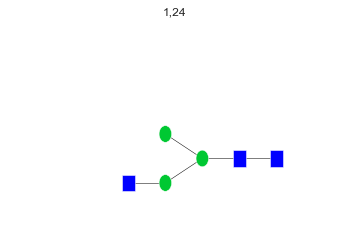

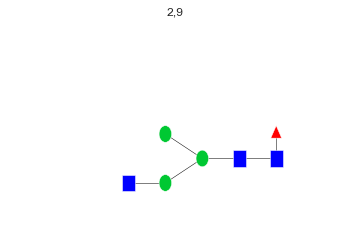

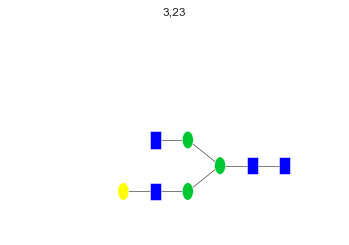

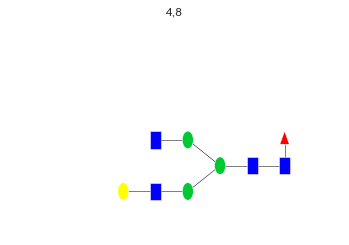

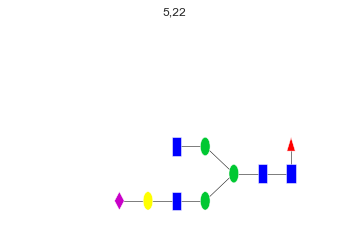

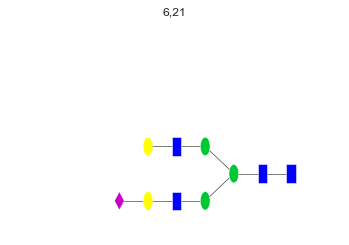

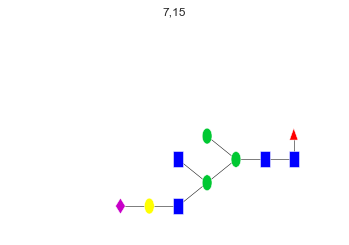

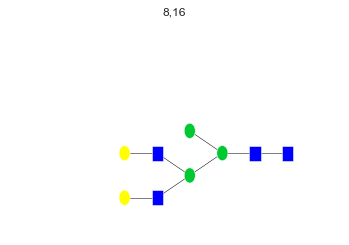

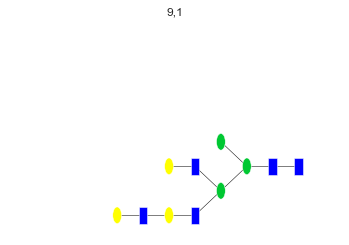

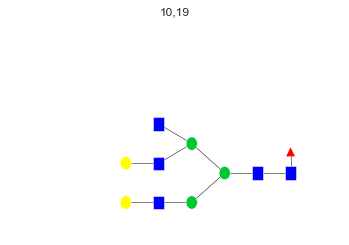

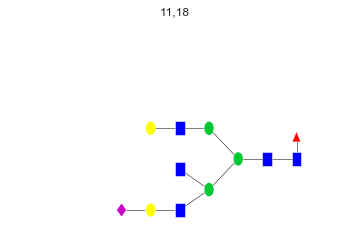

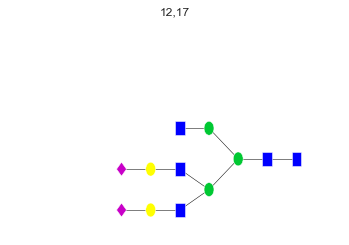

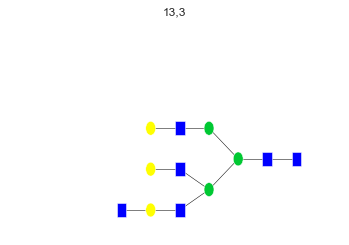

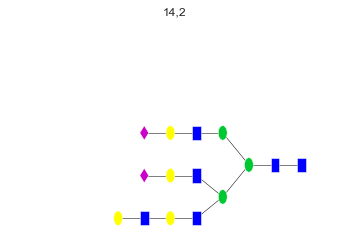

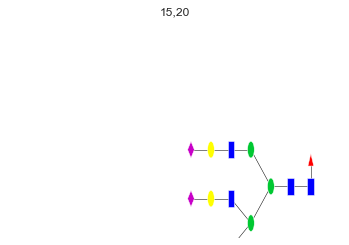

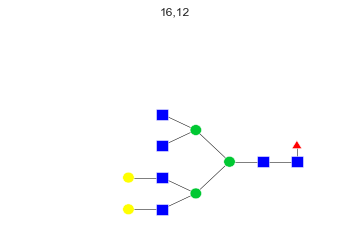

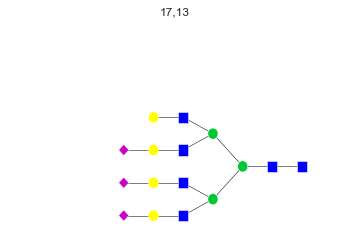

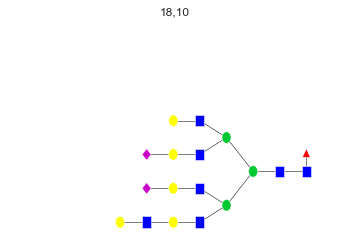

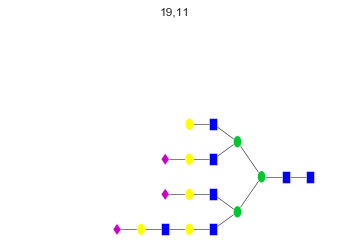

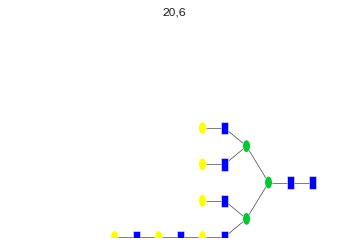

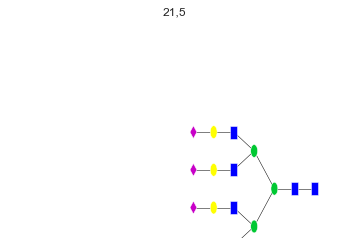

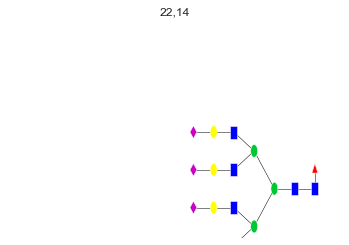

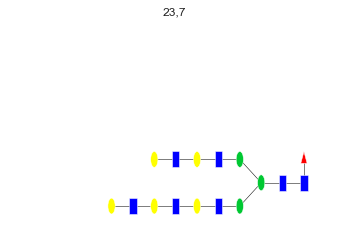

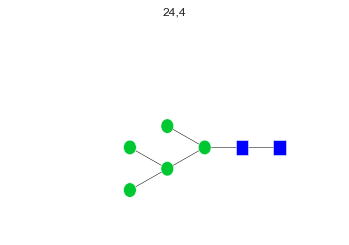

In [185]:
profile_dict={1:["EPO127.mgat1."],
2:["EPO174.mgat2."],
3:["EPO266.fut8."],
4:["KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "B3gnt2.mgat4a.mgat4b.mgat5",
   "mgat4A.mgat4B.mgat5",
   ],
5:["mgat5",
   "mgat4A.mgat4B",
   "EPO78.mgat4B."],
6:["st3gal4.st3gal6"], 
7:["B4GalT1",
   "B4GalT2",
   "B4GalT3",
   "B4GalT4",
   "WT",]}


# rearanged_list = [21,22,20,23,18,16,17,19,13,1,14,12,2,3,15,7,8,10,11,5,4,9,24,6]

rearanged_list = [24,9,23,8,22,21,15,16,1,19,18,17,3,2,20,12,13,10,11,6,5,14,7,4]
for idex, i in enumerate(rearanged_list):
    plot_glycan_utilities.plot_glycan(rep_list[i-1], title=str(idex+1)+','+str(i))
profile_Gly=[]
profile_name_order = []
for i in range(1,len(profile_dict)+1):
    for j in profile_dict[i]:
        profile_Gly.append(j)
        profile_name_order.append(j)
def generate_weight(vec_, merged_weights_dict):
    weight_vec = [merged_weights_dict[i] for i in vec_]
    _sum =sum(weight_vec)
    return [i/_sum for i in weight_vec]


substructure_table = np.zeros((len(glyco_motif_cluster_dict),16))
for i in range(1,len(glyco_motif_cluster_dict)+1):
    temp_table =  deepcopy(motif_abd_table[profile_name_order][motif_abd_table.index.isin(glyco_motif_cluster_dict[i])])
    temp_table = np.array(temp_table)
    _weight_vec = generate_weight(sorted(glyco_motif_cluster_dict[i]),merged_weights_dict)
    _substructure_vec = np.zeros((1,16))
    for idex, j in enumerate(temp_table):
        _substructure_vec += j*_weight_vec[idex]
#     scaler = preprocessing.StandardScaler().fit(temp_table)
    substructure_table[i-1,] = _substructure_vec[0,]


In [186]:
reorder_glycoprofile_table = np.zeros(motif_abd_table.shape)
_cur_row = 0
_index = []
for i in sorted(list(glyco_motif_cluster_dict), reverse=True):
    temp_table =  deepcopy(motif_abd_table[profile_name_order][motif_abd_table.index.isin(glyco_motif_cluster_dict[i])])
    _index.extend(glyco_motif_cluster_dict[i])
    temp_table = np.array(temp_table)
#     _weight_vec = generate_weight(sorted(glyco_motif_cluster_dict[i]),merged_weights_dict)
    for j in range(temp_table.shape[0]):
        reorder_glycoprofile_table[_cur_row]=temp_table[j]
        _cur_row+=1
#     _substructure_vec = np.zeros((1,16))
#     for idex, j in enumerate(temp_table):
#         _substructure_vec += j*_weight_vec[idex]
# #     scaler = preprocessing.StandardScaler().fit(temp_table)
#     substructure_table[i-1,] = _substructure_vec[0,]
cluster_table_redraw = pd.DataFrame(data=reorder_glycoprofile_table, index=_index, columns=profile_name_order).transpose()
# cluster_table_redraw
# fig, ax = plt.subplots(figsize=(16,10))
# # cmap = sns.color_palette("Reds", 40)
# # cmap=sns.color_palette("RdBu_r", 20)
# sns.heatmap(cluster_table_redraw.round(2), ax=ax, annot=False, cmap=sns.color_palette("Reds", 25), linewidths=.01, linecolor='black')
# plt.tight_layout()
# plt.savefig(keywords_dict['plot_output_dir']+'/raw_abundance_glycoprofile_redraw.eps')


# Figure 2c Substructure representative table

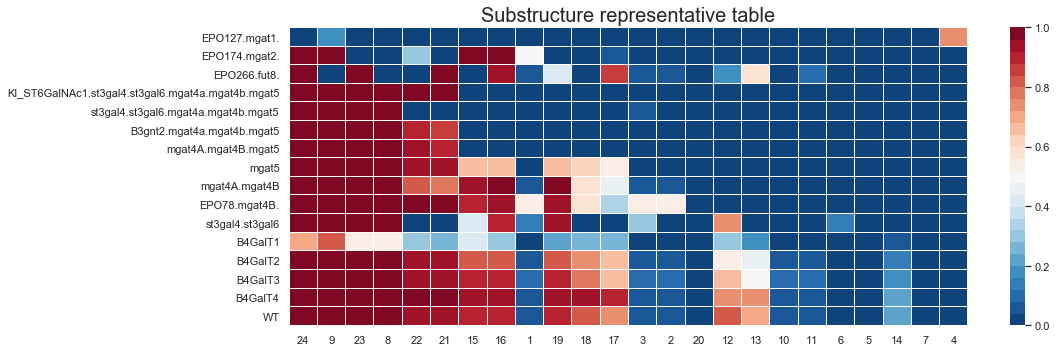

In [187]:

substre_profile=pd.DataFrame(data=substructure_table.transpose(), index=profile_name_order, columns=range(1,25))
substre_profile=substre_profile[[i for i in rearanged_list]]
fig, ax = plt.subplots(figsize=(16,5))
substre_profile=substre_profile.round(5)
substre_profile.to_csv(keywords_dict['output_data_dir']+keywords_dict['project_name']+"_abundance_representatives.csv")
sns.heatmap(substre_profile.round(2), ax=ax, cmap=sns.color_palette("RdBu_r", 25), linewidths=.01, linecolor='white')
plt.title('Substructure representative table', size=20)
plt.tight_layout()
plt.savefig(keywords_dict['plot_output_dir']+keywords_dict['project_name']+'_raw_abundance_sub.eps')
plt.show()
# substre_profile_zscore.round(2).to_csv(os.path.join(keywords_dict['intermediate_dir'], str(len(selected_name_list))+r"substre_profile_zscore.txt"))

# plt.tight_layout()
# plt.savefig(keywords_dict['plot_output_dir']+'/raw_abundance_sub_shifted.eps')
# plt.show()

# 1-sample one-side wilcoxn test with zsplit
### zsplit includes zero-differences in the ranking process and splits the zero rank between positive and negative ones

In [188]:
# from scipy.stats import shapiro, anderson, boxcox
from scipy.stats import yeojohnson, probplot, wilcoxon
from scipy import stats

# i = substre_profile.columns[0]
# _a, _b = wilcoxon(substre_profile[i]-j, zero_method='zsplit')

# wilcoxon_statistic_table = np.zeros(substre_profile.shape)
# p_value_table = np.zeros(substre_profile.shape)
# for idex, i in enumerate(substre_profile.columns):
# #     print(substre_profile[i])
#     b_a,b_b = wilcoxon(substre_profile[i]-substre_profile[i][-1], zero_method='zsplit', correction=True, alternative='greater')
#     for jdex, j in enumerate(substre_profile[i]):
# #         print(substre_profile[i]-j)
# #         print('j:',j, )
# #         print(type(i), type(j))
#         if j > substre_profile[i][-1]:
#             test = 'greater'
#         else:
#             test = 'less'
#         _a,_b=wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True, alternative=test)
# #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
#         wilcoxon_statistic_table[jdex,idex]=b_a-_a
#         p_value_table[jdex,idex]=_b if _b < 0.5 else 1-_b

        
# substre_profile=pd.read_csv(keywords_dict['intermediate_dir']+keywords_dict['project_name']+"_abundance_representatives.csv", index_col=0)
substre_profile.columns=range(1,25)
substre_profile

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
EPO127.mgat1.,0.00000,0.16057,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.72793
EPO174.mgat2.,1.00000,1.00000,0.00000,0.00000,0.30769,0.00000,0.98525,0.96865,0.48765,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
EPO266.fut8.,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.91888,0.04455,0.40672,...,0.00000,0.15776,0.57650,0.00000,0.07602,0.02247,0.03307,0.00000,0.00000,0.00000
KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5,0.99280,0.99520,0.98040,0.98040,0.96691,0.96130,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
st3gal4.st3gal6.mgat4a.mgat4b.mgat5,0.99476,0.99651,0.97687,0.97687,0.00000,0.00000,0.00000,0.00000,0.02645,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00233,0.00000,0.00000,0.03158,0.00000
B3gnt2.mgat4a.mgat4b.mgat5,0.99319,0.99546,0.99092,0.99092,0.88657,0.86686,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mgat4A.mgat4B.mgat5,1.00000,1.00000,1.00000,1.00000,0.91540,0.89799,0.00000,0.00000,0.00570,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mgat5,1.00000,1.00000,1.00000,1.00000,0.95254,0.94780,0.66784,0.66784,0.01110,0.66784,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mgat4A.mgat4B,1.00000,1.00000,1.00000,1.00000,0.80669,0.77205,0.94536,0.97474,0.06393,0.97474,...,0.00630,0.00000,0.00000,0.00000,0.00000,0.00210,0.00183,0.00000,0.00000,0.00000
EPO78.mgat4B.,1.00000,1.00000,1.00000,1.00000,0.98373,0.97884,0.87584,0.91525,0.54083,0.91525,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [189]:
from scipy.stats import norm
import numpy as np
def get_effect_size(p, sample_size=16):
    return np.abs(norm.ppf(p)/np.sqrt(sample_size))

print(get_effect_size(0.0031))
for idex in [18,20]:
    i = substre_profile.columns[idex]
    for jdex in [2]:
        j = substre_profile[i][jdex]
        # help(stats.wilcoxon)
        if j > substre_profile[i][-1]:
            test = 'greater'
        elif j< substre_profile[i][-1]:
            test = 'less'
        else: 
            test='same'
        print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
        
        _a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
        #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
        _b=_b/2 if _b < 0.5 else (1-_b)/2
        
        print(_a, _b, get_effect_size(_b))
    print("\n")

0.6842530416211653
19 greater 0.07602 EPO266.fut8.
2.5 0.00027233836108283345 0.8644411940657835


21 greater 0.03307 EPO266.fut8.
0.5 0.0002030214484087167 0.8840311883985099




In [23]:
#St3gal4/6
reload(stats)
i = substre_profile.columns[12]
jdex= -6
# help(stats.wilcoxon)
j = substre_profile[i][-6]

if j > substre_profile[i][-1]:
            test = 'greater'
else:
            test = 'less'
print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
_a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
#         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
_b=_b/2 if _b < 0.5 else (1-_b)/2
print("st3gal4.st3gal6: Rep",_a, _b, get_effect_size(_b))


i = substre_profile.columns[19]
# jdex=substre_profile.index[-6]
# help(stats.wilcoxon)
j = substre_profile[i][-6]
if j > substre_profile[i][-1]:
            test = 'greater'
else:
            test = 'less'
print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
_a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
#         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
_b=_b/2 if _b < 0.5 else (1-_b)/2
print(_a, _b, get_effect_size(_b))

13 greater 0.27765 st3gal4.st3gal6
st3gal4.st3gal6: Rep 9.5 0.001331693992636731 0.7510332699033224
20 greater 0.13302 st3gal4.st3gal6
0.5 0.00023493347892443456 0.8743428828779


In [24]:
for idex in [8,12,13, 14]:
    i = substre_profile.columns[idex]
    for jdex in [7,8,9]:
        j = substre_profile[i][jdex]
        # help(stats.wilcoxon)
        if j > substre_profile[i][-1]:
            test = 'greater'
        elif j< substre_profile[i][-1]:
            test = 'less'
        else: 
            test='same'
        print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
        
        _a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
        #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
        _b=_b/2 if _b < 0.5 else (1-_b)/2
        print(_a, _b, get_effect_size(_b))
    print("\n")

for idex in range(15,22):
    i = substre_profile.columns[idex]
    for jdex in range(7,10):
        j = substre_profile[i][jdex]
        # help(stats.wilcoxon)
        if j > substre_profile[i][-1]:
            test = 'greater'
        elif j< substre_profile[i][-1]:
            test = 'less'
        else: 
            test='same'
        print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
        
        _a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
        #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
        _b=_b/2 if _b < 0.5 else (1-_b)/2
        print(_a, _b, get_effect_size(_b))
    print("\n")

9 less 0.0111 mgat5
18.5 0.00561554794524357 0.6338562626601719
9 greater 0.06393 mgat4A.mgat4B
51.5 0.20386529659727454 0.20697347352168877
9 greater 0.54083 EPO78.mgat4B.
0.5 0.0002633412461079878 0.8667014203720715


13 less 0.0111 mgat5
25.5 0.014799825955957377 0.5438516782058542
13 greater 0.06603 mgat4A.mgat4B
38.5 0.0665399626006086 0.3755166349516612
13 greater 0.54083 EPO78.mgat4B.
0.5 0.00025994674622859443 0.8675729152331485


14 less 0.0111 mgat5
42.5 0.09674099214411941 0.32508680976885984
14 greater 0.06288 mgat4A.mgat4B
22.5 0.009625745597948222 0.5851562575839482
14 greater 0.54083 EPO78.mgat4B.
0.5 0.00024613234937270913 0.8712326501805452


15 less 0.0 mgat5
33.0 0.03191303804748083 0.46334820431459367
15 less 0.0063 mgat4A.mgat4B
2.5 0.00023979932198436152 0.872974877694162
15 less 0.0 EPO78.mgat4B.
33.0 0.03191303804748083 0.46334820431459367


16 less 0.0 mgat5
22.5 0.00877425727946951 0.5937522907154171
16 less 0.0 mgat4A.mgat4B
22.5 0.00877425727946951 0.5937522

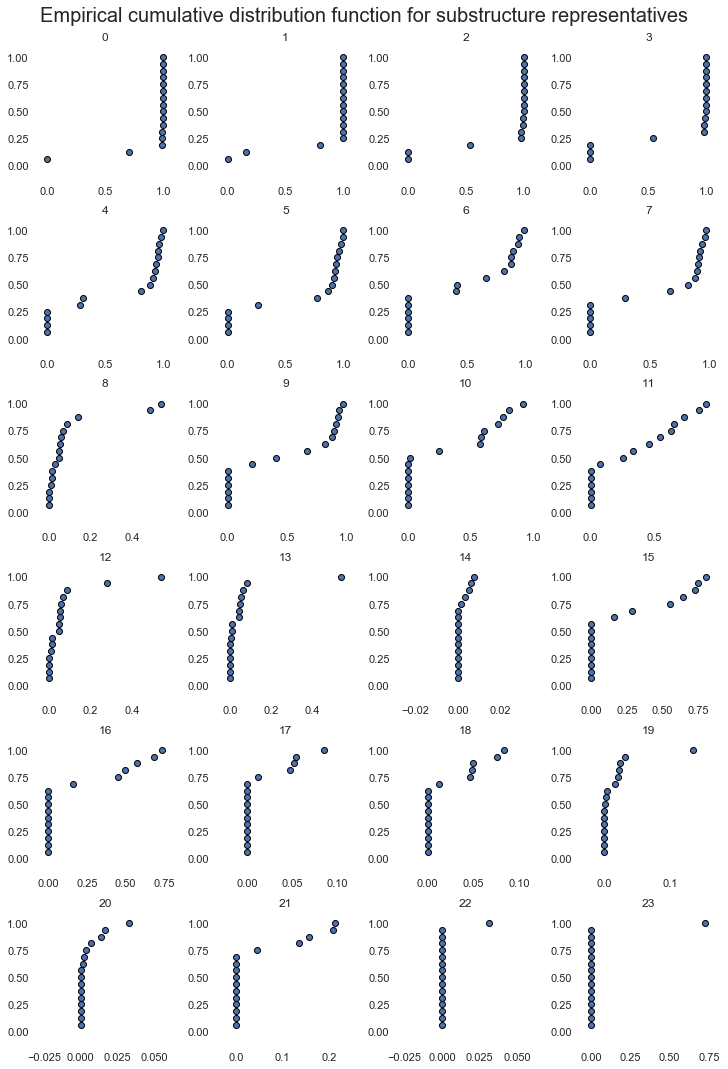

In [25]:

def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    plt.scatter(x=x, y=y)
    plt.show()

_count = 0
_len = 4
# plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(6, 4, constrained_layout=True)
# fig.patch.set_facecolor('white')
fig.suptitle('Empirical cumulative distribution function for substructure representatives', size=20)

fig.set_size_inches(10,15)
for idex, i in enumerate(substre_profile.columns):
#     fig.add_subplot(4, 6, idex+1)
    #             print(i)
    #             print(divmod(_count, _a))
    _x, _y = divmod(_count, _len)
    x = np.sort(substre_profile[i])
    n = x.size
    y = np.arange(1, n+1) / n
    axe=ax[_x][_y]
    axe.set_ylim(-0.1,1.1)
#     axe.set_xlim(-0.1,1.1)
    axe.set_facecolor('white')
    axe.scatter(x=x, y=y ,edgecolors='black')
    axe.set_title(str(idex))
#     plt.show()
    _count += 1
# plt.show()
plt.savefig(keywords_dict['plot_output_dir']+keywords_dict['project_name']+"_ECDF.eps")


# Selected the example for Figure 2d, 3

In [190]:
import numpy as np
import matplotlib.pyplot as plt
#  matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20)
def compare_profile(profile_table, name_list, ax, addr=None):
    # data to plot

    # create plot
    profile_table.columns=name_list
#     print('a', profile_table.shape)
#     print('a', profile_table)
#     for i in zip(range(profile_table.shape[0]),profile_table.iloc[:,0]):
#         print(i)
#     print(profile_table.iloc[0,0])
#     print('fini')
    index = np.arange(profile_table.shape[0])
    bar_width = min(0.25, 1/(profile_table.shape[1]+2))
    opacity = 0.8
    rects_list=[0]*profile_table.shape[1]
    if ax is None:
        fig, ax = plt.subplots(figsize=(8 ,3))
        ax.set_facecolor('white')
#         plt
        plt.xlabel('Substructure', size=20)
        plt.ylabel('Stdscaled difference', size=20)
        plt.title('Glycoprofile comparison', size=20)
        plt.xlabel('Substructure', size=20)
        plt.ylim(-5,5)
        
        for i,j in enumerate(profile_table.columns):
            plt.bar(index+i*bar_width, profile_table[j], bar_width,
    #                  alpha=opacity,
    #                  color='b',
                     label=str(j))
        plt.legend(name_list, loc=1)
        plt.yticks(size=15)
        plt.axhline(y=0, color='Black', linestyle='-',linewidth=0.1)
        plt.yticks([-4,-2,0,2,4], ['-4','-2','0','2','4'])
        plt.xticks(index-1/(profile_table.shape[1]+2), ([str(x) for x in range(1, profile_table.shape[0]+1)]))
        plt.savefig(addr)
        plt.tight_layout()
    else:
#         print(name_list)
        print('index', index)
        ax.set_facecolor('white')
        ax.set_ylim(-5,5)
#     ax.set_yticklabels(size=15)
        
    
        for i,j in enumerate(profile_table.columns):
            ax.bar(index+i*bar_width, profile_table[j], bar_width,
    #                  alpha=opacity,
    #                  color='b',
                     label=str(j))
        ax.legend(name_list, loc=2)
        ax.set_yticks([-4,-2,0,2,4])
        ax.axhline(y=0, color='Black', linestyle='-',linewidth=0.5)
        ax.set_yticklabels(['-4','-2','0','2','4'])
        ax.set_xticks(index-1/(profile_table.shape[1]+2), )
        ax.set_xticklabels(([str(x) for x in range(1, profile_table.shape[0]+1)]))
    if addr:
        
#     ax.tight_layout()
        plt.savefig(addr)
# compare_profile(substre_profile[])

# Raw plots and related plots for Figure 2d

In [191]:

# fig, axes = plt.subplots(2, 1, squeeze=False, facecolor='white')

# # plt.title(title)
# fig.set_size_inches(8, 6)
# _count = 0
# # _profile_dict={1:["EPO127.mgat1.", "EPO174.mgat2.", "EPO266.fut8.", "st3gal4.st3gal6"]
# # _name_list = [x for x in mod_profile_dict[i]]
# condense_plot = ["EPO266.fut8.", "st3gal4.st3gal6", ]
# condense_plot_name = ['EPO266.KO_fut8','KO_st3gal4/6']
# sns.set(palette='Accent_r')

substre_profile_zscore=substre_profile.apply(zscore)


# fig, ax = plt.subplots(figsize=(16, 5))
# sns.heatmap(substre_profile_zscore.round(2), ax=ax, cmap=sns.color_palette("RdBu_r", 40), linewidths=.01, linecolor='white', annot=True)

if 'B4GalT2' in substre_profile_zscore.columns:
    pass
else:
    substre_profile_zscore = substre_profile_zscore.transpose()
substre_profile_zscore=substre_profile_zscore.round(3)
substre_profile_zscore_with_baseWT = substre_profile_zscore.copy()
base = list(substre_profile_zscore.WT.tolist())
for i in substre_profile_zscore_with_baseWT.columns:
#     print(base)
    substre_profile_zscore_with_baseWT[i]=substre_profile_zscore_with_baseWT[i]-base


# for idex, i in enumerate(condense_plot):
#     #             print(i)
#     #             print(divmod(_count, _a))
#     _name_list = [i]
    
# #     _x, _y = divmod(_count, _len)
#     ax=axes[idex][0]
#     compare_profile(deepcopy(substre_profile_zscore_with_baseWT[_name_list]), [condense_plot_name[idex]], ax=ax)#addr=__init__.plot_output_address+"substructure_cluster_"+str(i)+".eps")
# #     _count += 1
# plt.savefig(keywords_dict['plot_output_dir']+"substructure_cluster_condense.eps")

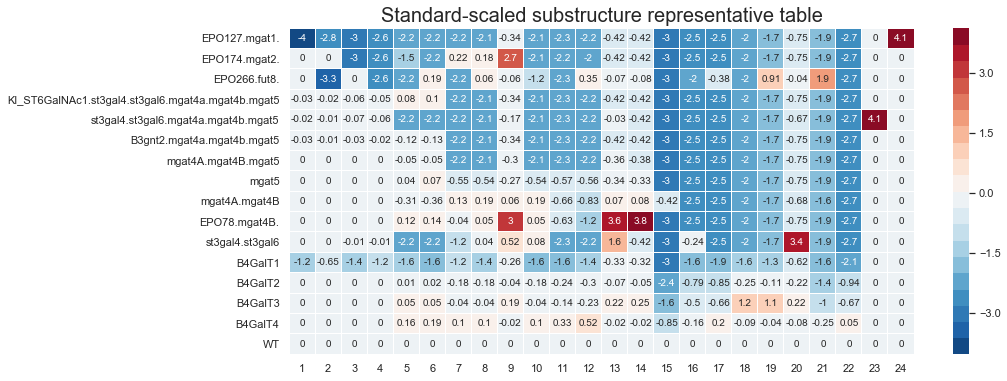

In [192]:
substre_profile_zscore_with_baseWT1=substre_profile_zscore_with_baseWT.transpose()
substre_profile_zscore_with_baseWT1.to_csv(keywords_dict['plot_output_dir']+keywords_dict['project_name']+ r"_substructure_matrix_std_base.txt")
fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(substre_profile_zscore_with_baseWT1.round(2), annot=True, ax=ax, cmap=sns.color_palette("RdBu_r", 20), linewidths=.005, linecolor='white')
plt.title('Standard-scaled substructure representative table', size=20)

plt.savefig(keywords_dict['plot_output_dir']+keywords_dict['project_name']+'_adjusted_abundance_zscore.eps')
plt.show()


# Raw plots and related plots for Figure 3

['EPO127.mgat1.']
['EPO174.mgat2.']
['EPO266.fut8.', 'st3gal4.st3gal6']
['KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'B3gnt2.mgat4a.mgat4b.mgat5', 'mgat4A.mgat4B.mgat5']
['mgat5', 'mgat4A.mgat4B', 'EPO78.mgat4B.']
['B4GalT1', 'B4GalT2', 'B4GalT3', 'B4GalT4', 'WT']


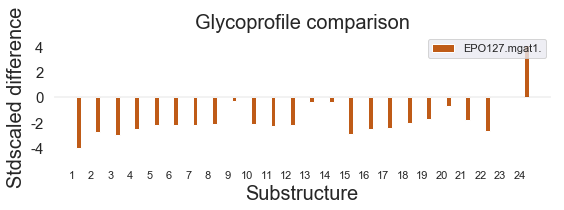

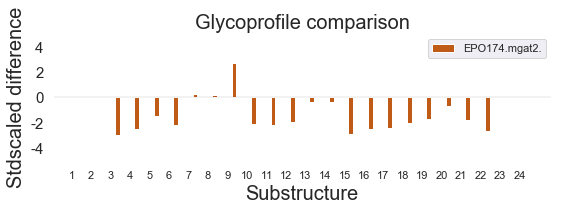

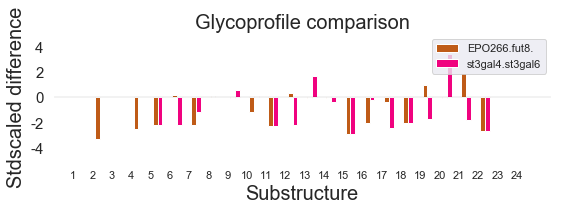

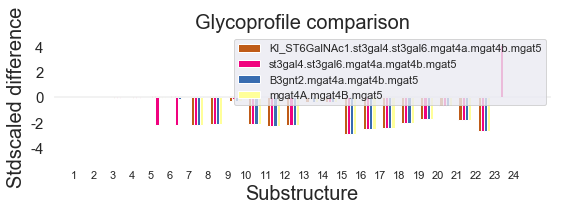

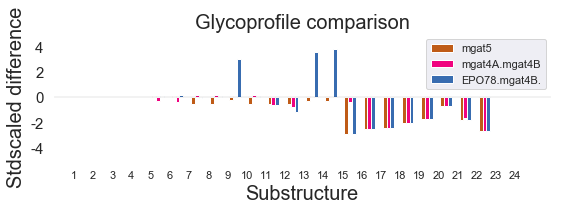

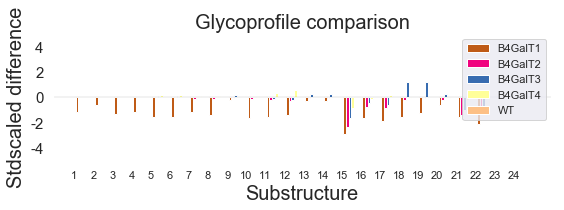

In [29]:
profile_dict={1:["EPO127.mgat1."],
2:["EPO174.mgat2."],
3:["EPO266.fut8.","st3gal4.st3gal6"],
4:["KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "B3gnt2.mgat4a.mgat4b.mgat5",
   "mgat4A.mgat4B.mgat5",
   ],
5:["mgat5",
   "mgat4A.mgat4B",
   "EPO78.mgat4B."],

7:["B4GalT1",
   "B4GalT2",
   "B4GalT3",
   "B4GalT4",
   "WT",]}
mod_profile_dict=profile_dict
sns.set(palette='Accent_r')
if 'B4GalT2' in substre_profile_zscore.columns:
    pass
else:
    substre_profile_zscore = substre_profile_zscore.transpose()
substre_profile_zscore=substre_profile_zscore.round(3)
substre_profile_zscore_with_baseWT = substre_profile_zscore.copy()
base = list(substre_profile_zscore.WT.tolist())
for i in substre_profile_zscore_with_baseWT.columns:
#     print(base)
    substre_profile_zscore_with_baseWT[i]=substre_profile_zscore_with_baseWT[i]-base
#     print(substre_profile_zscore_with_baseWT[i])
#     print(substre_profile_zscore_with_baseWT[i])
for i in sorted(mod_profile_dict):
#     for j in profile_dict[i]:
    _name_list = [x for x in mod_profile_dict[i]]
#     print(_name_list, len(_name_list))
    print(_name_list)
    compare_profile(deepcopy(substre_profile_zscore_with_baseWT[_name_list]), _name_list, ax=None, addr=keywords_dict['plot_output_dir']+keywords_dict['project_name']+"cluster_rep_abd_std_scaled"+str(i)+".eps")
    



In [30]:
# from sklearn.decomposition import PCA as pca
# # Y_sklearn = sklearn_pca.fit_transform(X_std)
# group_list = [1,1,1,2,2,2,2,4,3,3,3,5,5,5,5,5]

In [31]:
# import matplotlib.pyplot as plt
# def _pca(data_table, group_list):
#     sklearn_pca = pca(n_components=3)
#     projected = sklearn_pca.fit_transform(data_table)
#     print(sklearn_pca.explained_variance_ratio_)

#     fig, ax = plt.subplots()
# #     ax.scatter(z, y)


#     plt.scatter(projected[:, 0], projected[:, 1],
#                 c=group_list, edgecolor='none', alpha=0.5,
#                 cmap=plt.cm.get_cmap('Dark2',5), )
#     plt.xlabel('component 1')
#     plt.ylabel('component 2')
#     for i, txt in enumerate(data_table.index.tolist()):
#         ax.annotate(txt, (projected[i, 0]+0.1, projected[i,1]))
#     plt.colorbar();
    


In [32]:
# _pca(substre_profile.round(2), group_list)

In [33]:
# _pca(substre_profile_zscore.round(2), group_list)

In [34]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# import plotly 
# plotly.tools.set_credentials_file(username='hoveathly', api_key='bcBZdP07AvxyJ605DwHM')

In [35]:
# ax.scatter(xs, ys, zs, marker=m)

# plt.colorbar();
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

In [36]:
# for i in substre_profile.index.tolist():
#     print(i)

In [37]:
# # x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()
# sklearn_pca = pca(n_components=3)
# projected = sklearn_pca.fit_transform(substre_profile)
# trace1 = go.Scatter3d(
#     x=projected[:, 0],
#     y=projected[:, 1],
#     z=projected[:, 2],
#     text=substre_profile_zscore.index.tolist(),
#     mode='markers',
#     marker=dict(
#         size=12,
#         color=group_list,                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
#     )
# )

# data = [trace1]
# layout = go.Layout(
#     autosize=True,
#     hovermode='closest',
#     showlegend=False,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )

# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='3d-scatter-colorscale-2')

In [1]:
import glycompare


Thanks for using the GlyCompare v1.0, 
Please check our github for the latest update.


Bokan & Ben,
08/1/2019


